In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
# loading the dataset from csv file to a pandas DataFrme
df = pd.read_csv('Train.csv')
# first 5 row of the daraframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Understanding

In [3]:
# objective 
# Item_Outlet_Sales
# using product ( item) and brach (outlet) 
# tpye of Problem : Regression Problem 


In [4]:
# number of data points and number of features 
df.shape

(8523, 12)

In [5]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Target Variable 
target_variable = ["Item_Outlet_Sales"]


# Numerical Features 
numerical_features =  df.select_dtypes(include = ["int64" , "float64"]).columns.tolist()
numerical_features.remove ("Item_Outlet_Sales")

# Categorical Features 
Categorical_features = df.select_dtypes (include = ["object"]).columns.tolist()

# print results 
print("numerical_features :")
print(numerical_features)

print("Categorical_features :")
print(Categorical_features)

print("target_variable :")
print(target_variable)



numerical_features :
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
Categorical_features :
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target_variable :
['Item_Outlet_Sales']


In [7]:
# checking for missing values 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Missing 

In [8]:
# Most repeat value (mean value of "Item_Weight" column)
df["Item_Weight"].mean()


np.float64(12.857645184135976)

In [9]:
# filing the missing values in "Item_Weight" with mean value 
df["Item_Weight"].fillna (df['Item_Weight'].mean() , inplace=True)


C:\Users\elkholey\AppData\Local\Temp\ipykernel_7604\938270008.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item_Weight"].fillna (df['Item_Weight'].mean() , inplace=True)


In [10]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

C:\Users\elkholey\AppData\Local\Temp\ipykernel_7604\3318935412.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


In [11]:
# Replacing the missing values in "Outlet_Size" with mode 
mode_of_outlet_size = df.pivot_table(values = "Outlet_Size" , columns = "Outlet_Type" ,
                                      aggfunc = (lambda x:x.mode()[0]))
print(mode_of_outlet_size)


Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size        Medium            Medium            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_value = df['Outlet_Size'].isnull()

In [13]:
print(missing_value.sum())

0


In [14]:
df.loc[missing_value , "Outlet_Size"] = df .loc[missing_value , "Outlet_Type"].apply(lambda x : mode_of_outlet_size)

In [15]:
# checking for missing values 
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Analysis

In [16]:
# statistical measures about the data 
df.describe() 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
sns.set()

C:\Users\elkholey\AppData\Local\Temp\ipykernel_7604\3889408589.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


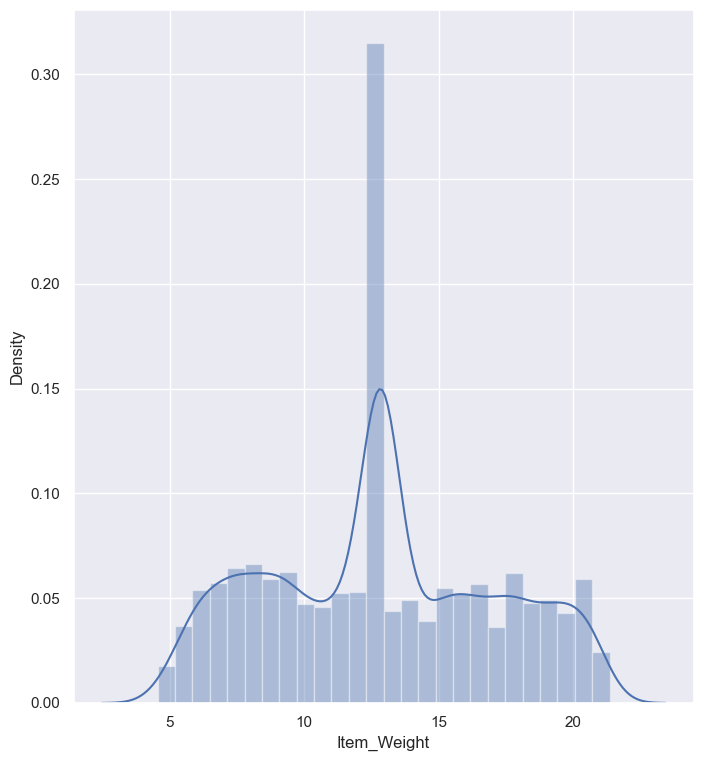

In [18]:
# Item_Weight distribution 
plt.figure(figsize = (8 , 9))
sns.distplot(df['Item_Weight'])
plt.show()

C:\Users\elkholey\AppData\Local\Temp\ipykernel_7604\4080390637.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


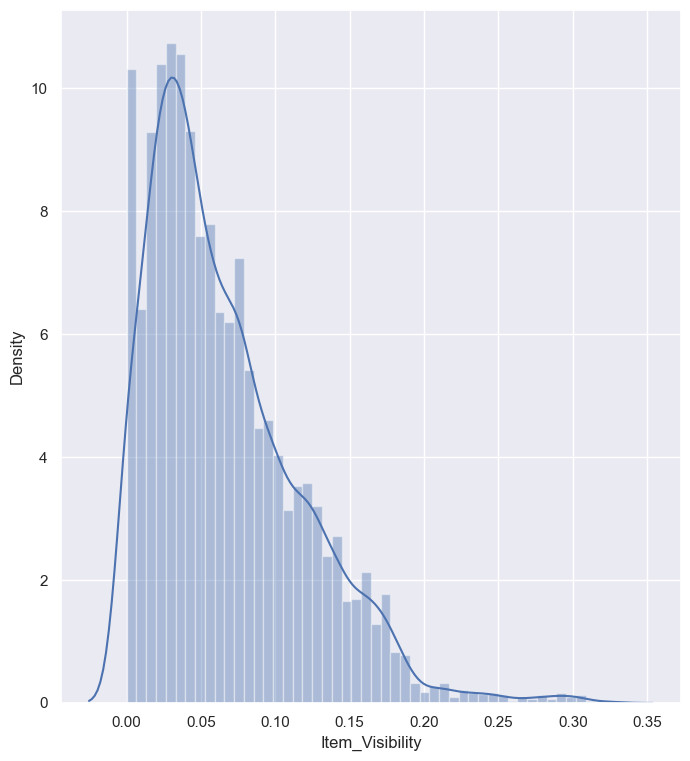

In [19]:
# Item_Visibility distribution 
plt.figure(figsize = (8 , 9))
sns.distplot(df['Item_Visibility'])
plt.show()

C:\Users\elkholey\AppData\Local\Temp\ipykernel_7604\1280040367.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


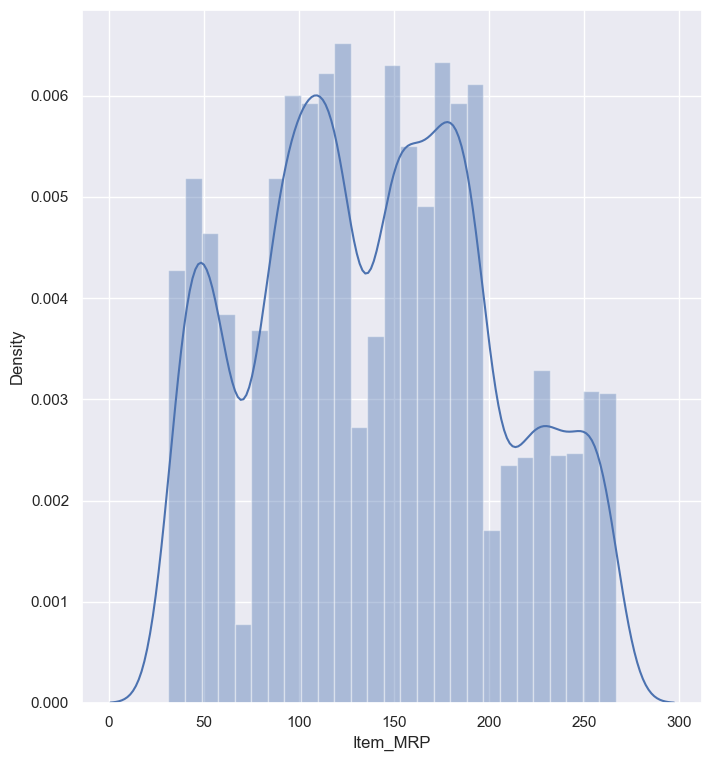

In [20]:
# Item_MRP distribution 
plt.figure(figsize = (8 , 9))
sns.distplot(df['Item_MRP'])
plt.show()

C:\Users\elkholey\AppData\Local\Temp\ipykernel_7604\3865560271.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


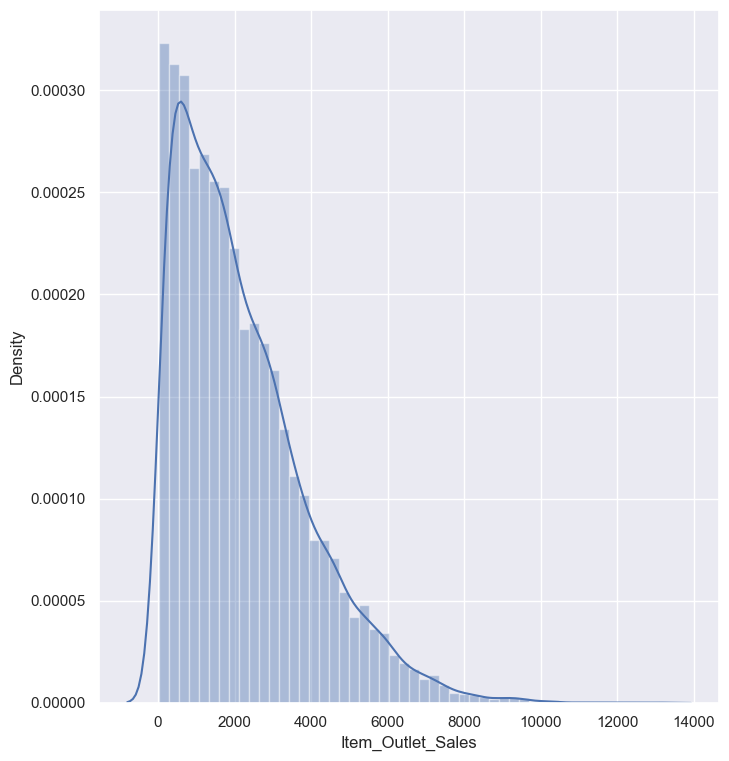

In [21]:
# Item_Outlet_Sales distribution 
plt.figure(figsize = (8 , 9))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

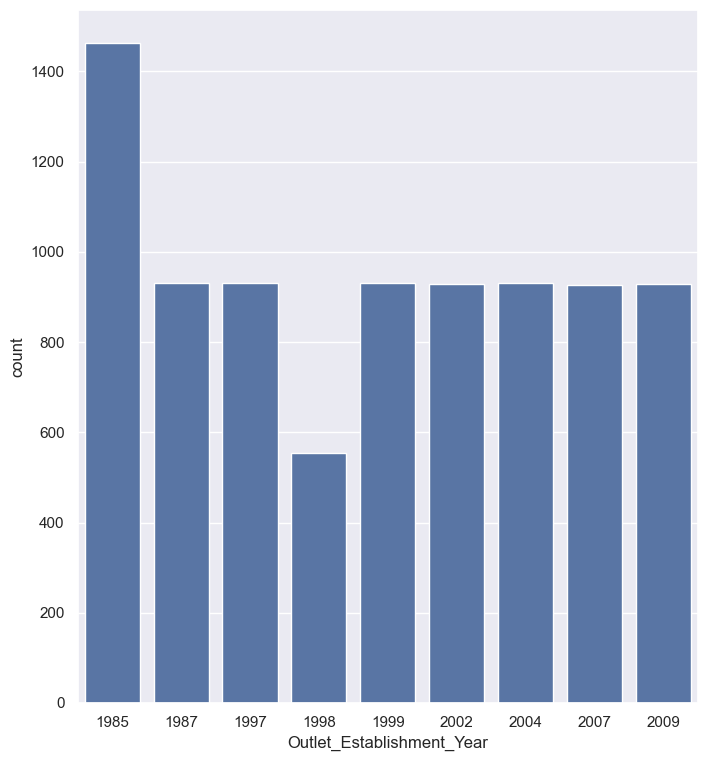

In [22]:
# Outlet_Establishment_Year distribution 
plt.figure(figsize = (8 , 9))
sns.countplot(x = 'Outlet_Establishment_Year' , data = df)
plt.show()

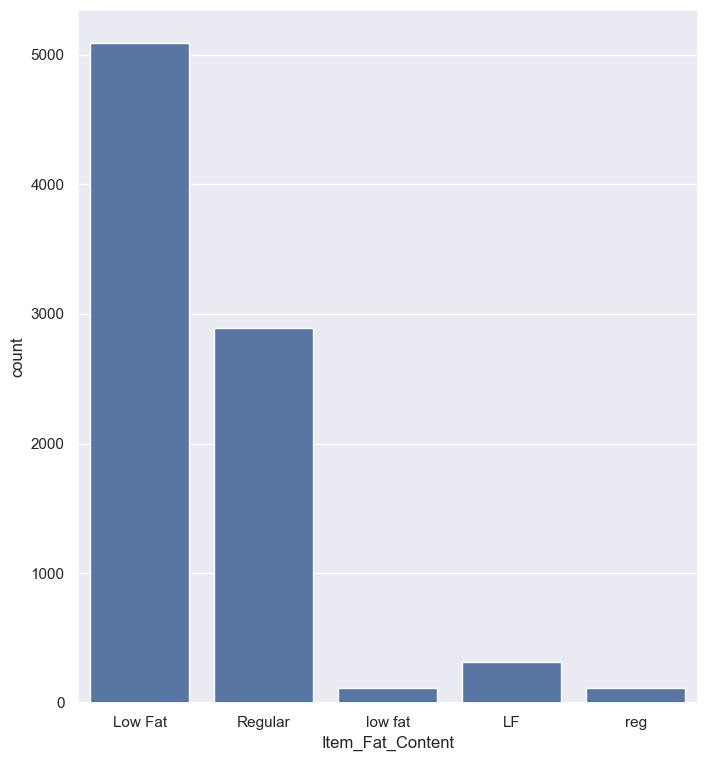

In [23]:
# Item_Fat_Content distribution 
plt.figure(figsize = (8 , 9))
sns.countplot(x = 'Item_Fat_Content' , data = df)
plt.show()

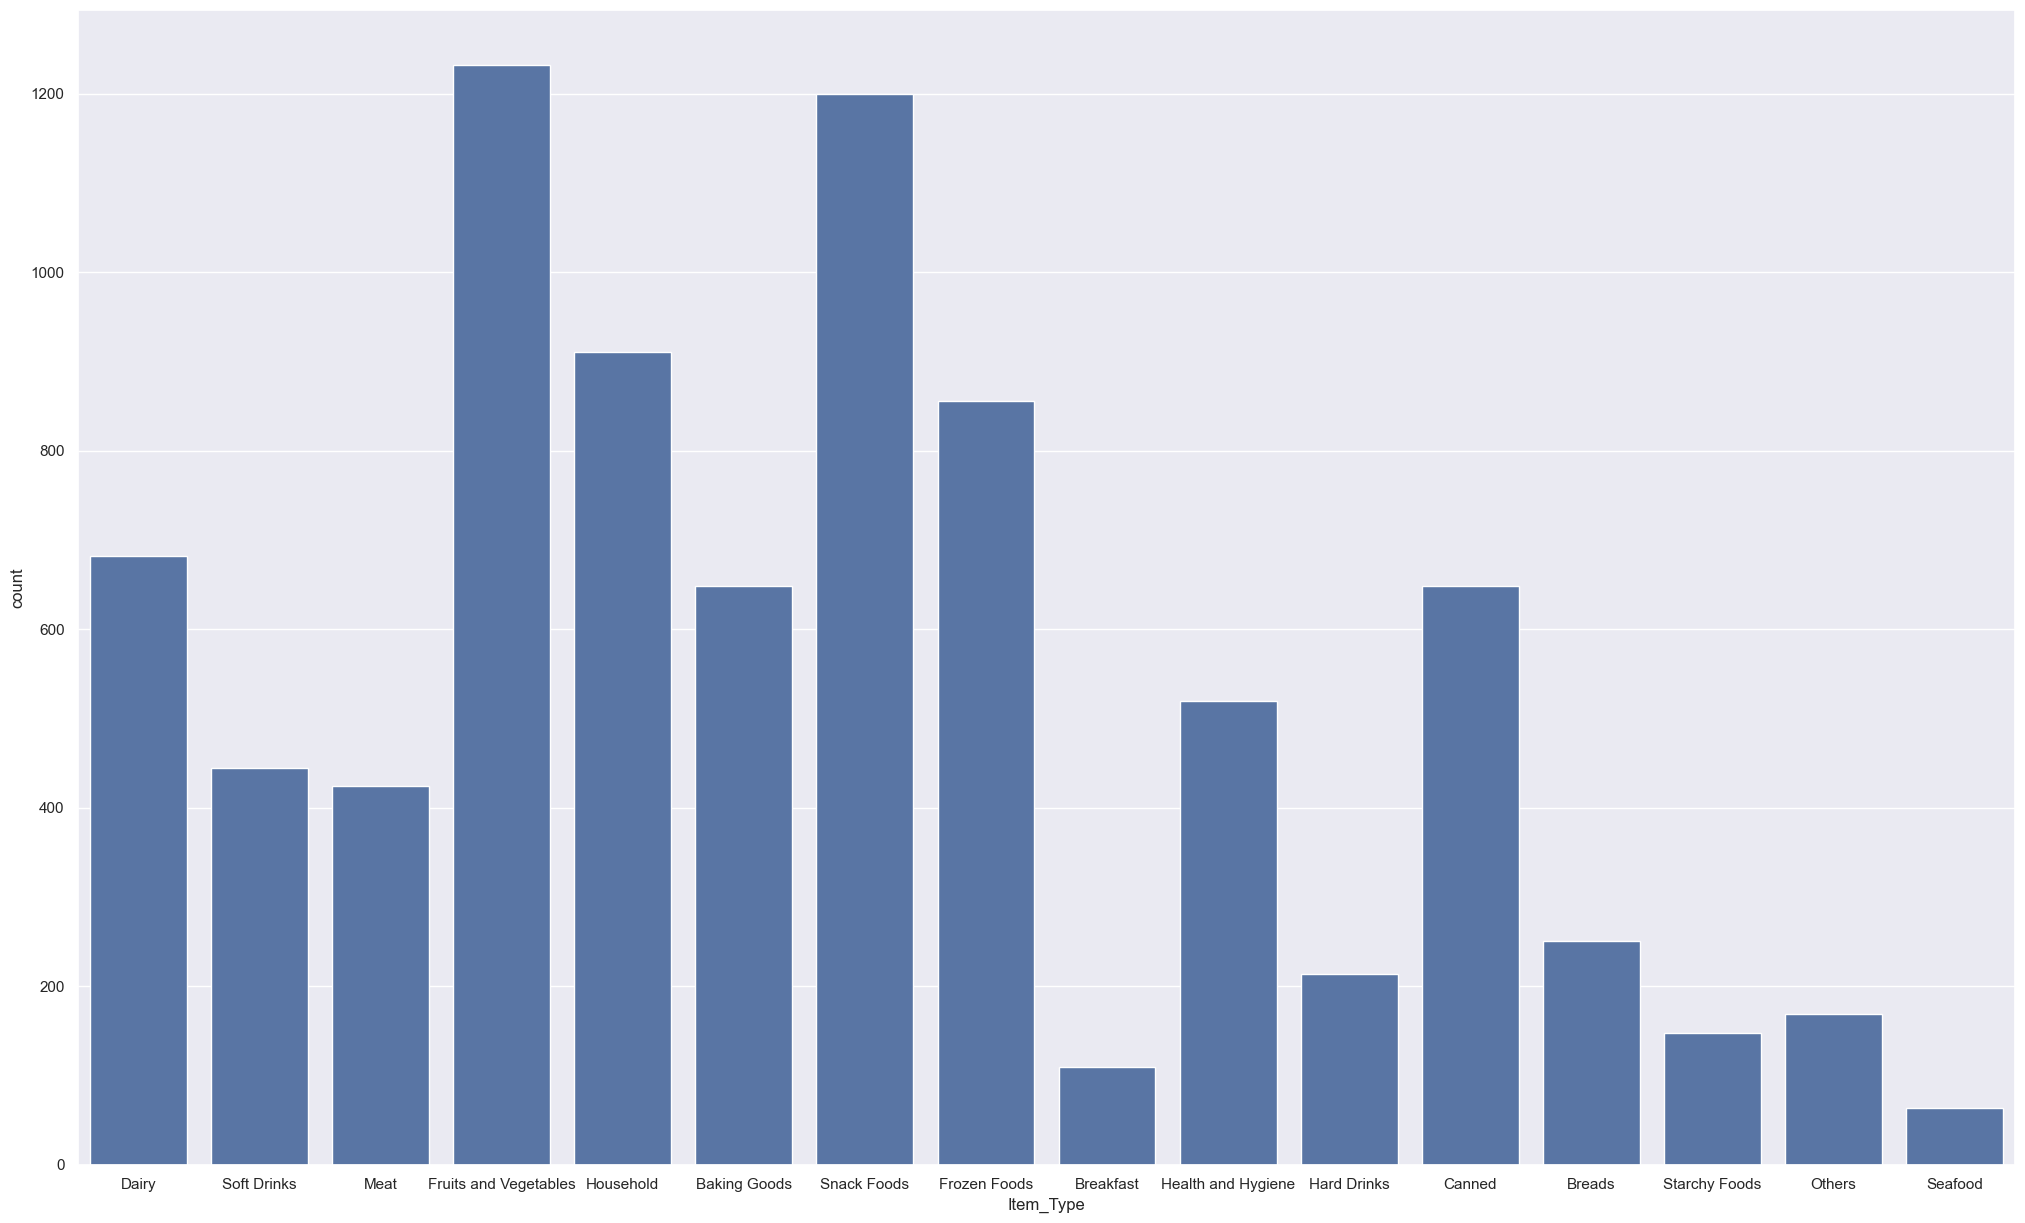

In [24]:
# Item_Type column
# Outlet_Establishment_Year distribution 
plt.figure(figsize = (25, 15))
sns.countplot(x = 'Item_Type' , data = df)
plt.show()

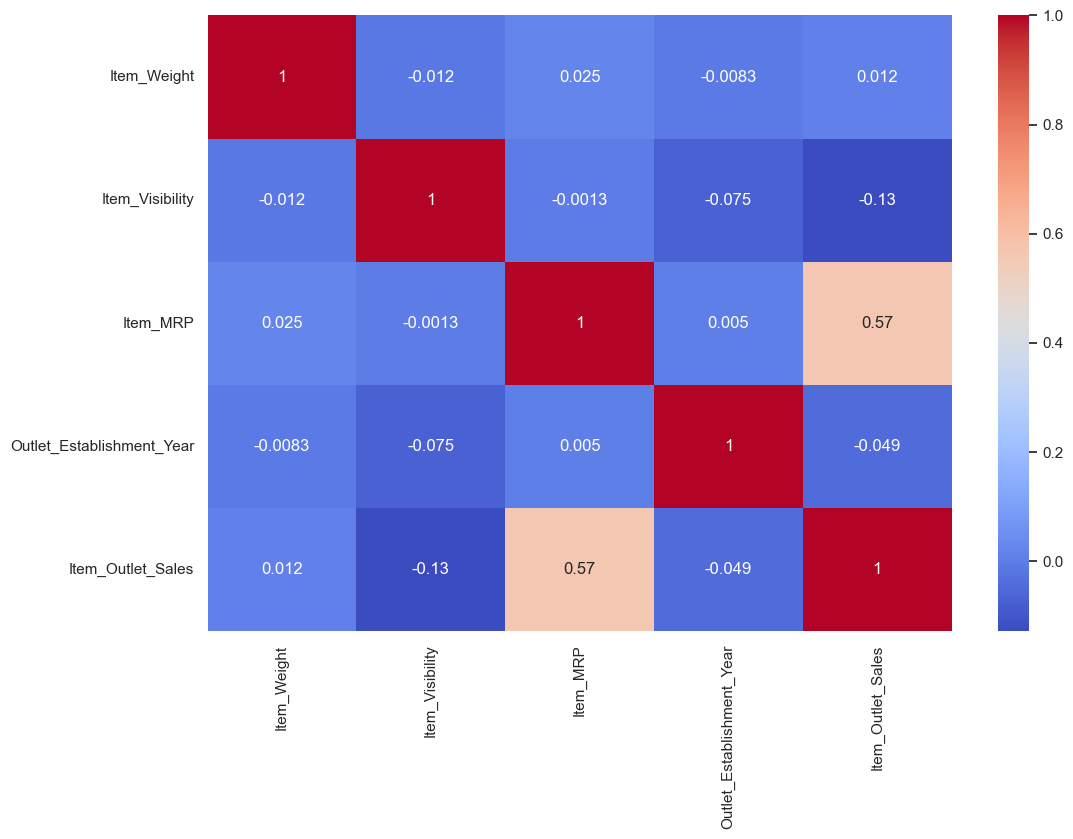

In [28]:
# Correlation Heatmap

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [29]:
import numpy as np

# أي قيمة مش string تتحول لـ NaN
df["Outlet_Size"] = df["Outlet_Size"].apply(
    lambda x: x if isinstance(x, str) else np.nan
)


In [30]:
outlet_size_mode = df.groupby("Outlet_Type")["Outlet_Size"].agg(
    lambda x: x.mode().iloc[0]
)

outlet_size_mode


Outlet_Type
Grocery Store        Medium
Supermarket Type1    Medium
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

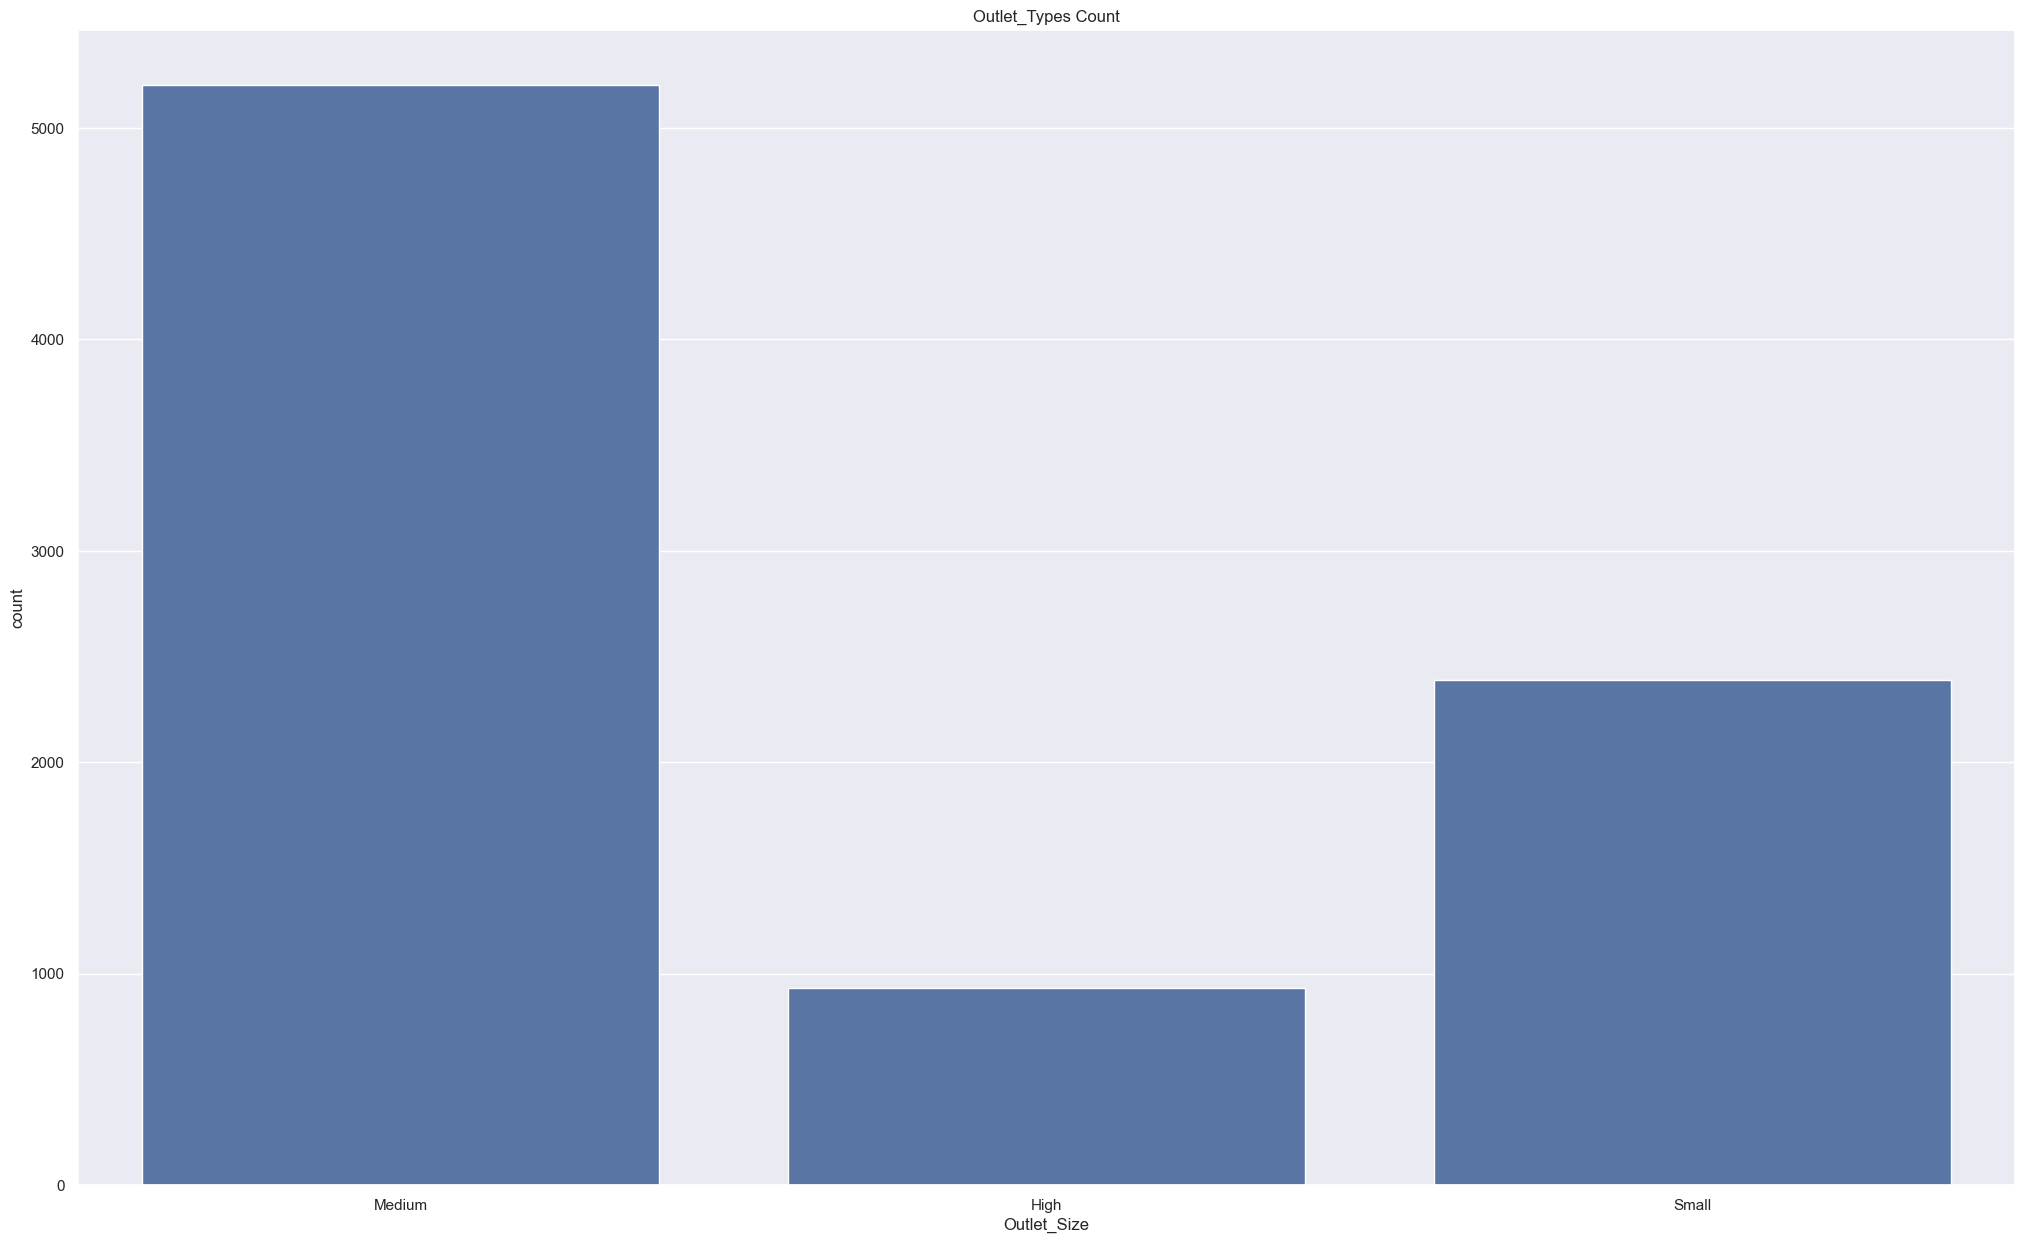

In [31]:
# Outlet_Size column
plt.figure(figsize = (25, 15))
sns.countplot(x = 'Outlet_Size' , data = df)
plt.title('Outlet_Types Count')
plt.show()

In [32]:
df["Outlet_Size"].dtype


dtype('O')

In [33]:
df["Outlet_Size"].unique()


array(['Medium', 'High', 'Small'], dtype=object)

In [34]:
df["Outlet_Size"].apply(type).value_counts()


Outlet_Size
<class 'str'>    8523
Name: count, dtype: int64

### Data Pre-processing 

In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [37]:
df.replace({"Item_Fat_Content":{'low fat' :"Low Fat" ,
                                'reg':'Regular',
                                'LF':"Low Fat"
                                }} , inplace = True)

In [38]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [39]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Label Encoding 

In [41]:
df.drop('Item_Identifier', axis=1, inplace=True)

In [42]:
categorical_cols = [
    'Item_Fat_Content',
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type'
]

In [43]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder 

df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

In [51]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### splitting features and target

In [52]:
X = df_encoded.drop(columns = 'Item_Outlet_Sales' , axis = 1 )
y = df_encoded[ 'Item_Outlet_Sales']

### splitting the data into training data and test data

In [53]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split (X , y , random_state=42 , test_size=0.2 )

In [54]:
print (X_train.dtypes , X_test.dtypes , y_train.dtypes , y_test.dtypes )

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Fat_Content_Regular              bool
Item_Type_Breads                      bool
Item_Type_Breakfast                   bool
Item_Type_Canned                      bool
Item_Type_Dairy                       bool
Item_Type_Frozen Foods                bool
Item_Type_Fruits and Vegetables       bool
Item_Type_Hard Drinks                 bool
Item_Type_Health and Hygiene          bool
Item_Type_Household                   bool
Item_Type_Meat                        bool
Item_Type_Others                      bool
Item_Type_Seafood                     bool
Item_Type_Snack Foods                 bool
Item_Type_Soft Drinks                 bool
Item_Type_Starchy Foods               bool
Outlet_Identifier_OUT013              bool
Outlet_Identifier_OUT017              bool
Outlet_Identifier_OUT018              bool
Outlet_Iden

### machine Learning Model Training 

In [55]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train , y_train )


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Evaluation the Model

In [56]:
# prediction on training data 
train_data_prediction = model.predict(X_train)
test_data_prediction = model.predict(X_test)

In [57]:
from sklearn.metrics  import r2_score
r2_train = r2_score(y_train ,train_data_prediction )
r2_test = r2_score(y_test ,test_data_prediction )

In [58]:
print("r2_train :" , r2_train)
print("r2_test :" , r2_test)

r2_train : 0.8707437403288072
r2_test : 0.5409744824511742


### RandomForestRegressor Model 

In [61]:
df_encoded['Item_Visibility'] = df_encoded['Item_Visibility'].replace(
    0, df_encoded['Item_Visibility'].mean()
)

In [62]:
X = df_encoded.drop('Item_Outlet_Sales', axis=1)
y = df_encoded['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=18,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

,n_estimators,400
,criterion,'squared_error'
,max_depth,18
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
from sklearn.metrics import r2_score

print("R2 Train:", r2_score(y_train, rf.predict(X_train)))
print("R2 Test :", r2_score(y_test, rf.predict(X_test)))

R2 Train: 0.7759230225999112
R2 Test : 0.5940010511328844
